# HR Analytics Project- Understanding the Attrition in HR

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading the dataset
df=pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 35)

The dataset has 1470 rows and 35 columns

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Since Attrition is what we are analyzing, let us rearrange the dataset for better and efficient Machine Learning

In [5]:
df=df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','Attrition']]

In [6]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,80,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,80,0,17,3,2,9,6,0,8,No


## EDA

In [7]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

As we can see, there are no null values in this dataset

In [8]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

As observed above most of the columns possess integer datatype, while the other columns including attrition possess string datatype.

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [11]:
df.DailyRate.unique()

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

In [12]:
df.DistanceFromHome.unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [13]:
df.Education.unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [14]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [15]:
df.EmployeeCount.unique()

array([1], dtype=int64)

In [16]:
df.EmployeeNumber.unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [17]:
df.EnvironmentSatisfaction.unique()

array([2, 3, 4, 1], dtype=int64)

In [18]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df.HourlyRate.unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [20]:
df.JobInvolvement.unique()

array([3, 2, 4, 1], dtype=int64)

In [21]:
df.JobLevel.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [22]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [23]:
df.JobSatisfaction.unique()

array([4, 2, 3, 1], dtype=int64)

In [24]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [25]:
df.MonthlyIncome.unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [26]:
df.MonthlyRate.unique()

array([19479, 24907,  2396, ...,  5174, 13243, 10228], dtype=int64)

In [27]:
df.NumCompaniesWorked.unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [28]:
df.Over18.unique()

array(['Y'], dtype=object)

In [29]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df.PercentSalaryHike.unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

In [31]:
df.PerformanceRating.unique()

array([3, 4], dtype=int64)

In [32]:
df.RelationshipSatisfaction.unique()

array([1, 4, 2, 3], dtype=int64)

In [33]:
df.StandardHours.unique()

array([80], dtype=int64)

In [34]:
df.StockOptionLevel.unique()

array([0, 1, 3, 2], dtype=int64)

In [35]:
df.TotalWorkingYears.unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [36]:
df.TrainingTimesLastYear.unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [37]:
df.WorkLifeBalance.unique()

array([1, 3, 2, 4], dtype=int64)

In [38]:
df.YearsAtCompany.unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [39]:
df.YearsInCurrentRole.unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [40]:
df.YearsSinceLastPromotion.unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

In [41]:
df.YearsWithCurrManager.unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

In [42]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

Some of the columns mentioned in this dataset do not add any value to the learning column i.e- Attrition.

For example, column such as EmployeeNumber is just a unique number provided to each employee working in the organization. 
It is the same case with EmployeeCount. 
The column Over18 only has one value, that is Yes, stating that all employees working here are over the age of 18 years. Hence, not much significance.
The column standard hours also does not contribute anything at all towards attrition. 
The column EmployeeCount also has only one unique value, which is 1, and as stated before, it is clear to note that it does not add to the learning of the model.

Hence, these 4 columns need to be removed for building an efficient model.

In [43]:
df.drop('Over18', axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)

df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,1,17,3,3,5,2,0,3,No
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,1,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,2,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,4,0,17,3,2,9,6,0,8,No


As seen, the dataset now reduces to 1470 rows and 31 columns

## Visualizing the Attrition Column 

No     1233
Yes     237
Name: Attrition, dtype: int64

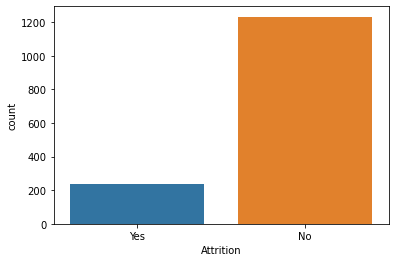

In [44]:
#Let us vsualize how many employees stayed in the company vs how many left the organization
sb.countplot(df['Attrition'])
df["Attrition"].value_counts()

## Correlation between the columns 

In [45]:
dfcorr=df.corr()
dfcorr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


## Visualizing the correlation table

<AxesSubplot:>

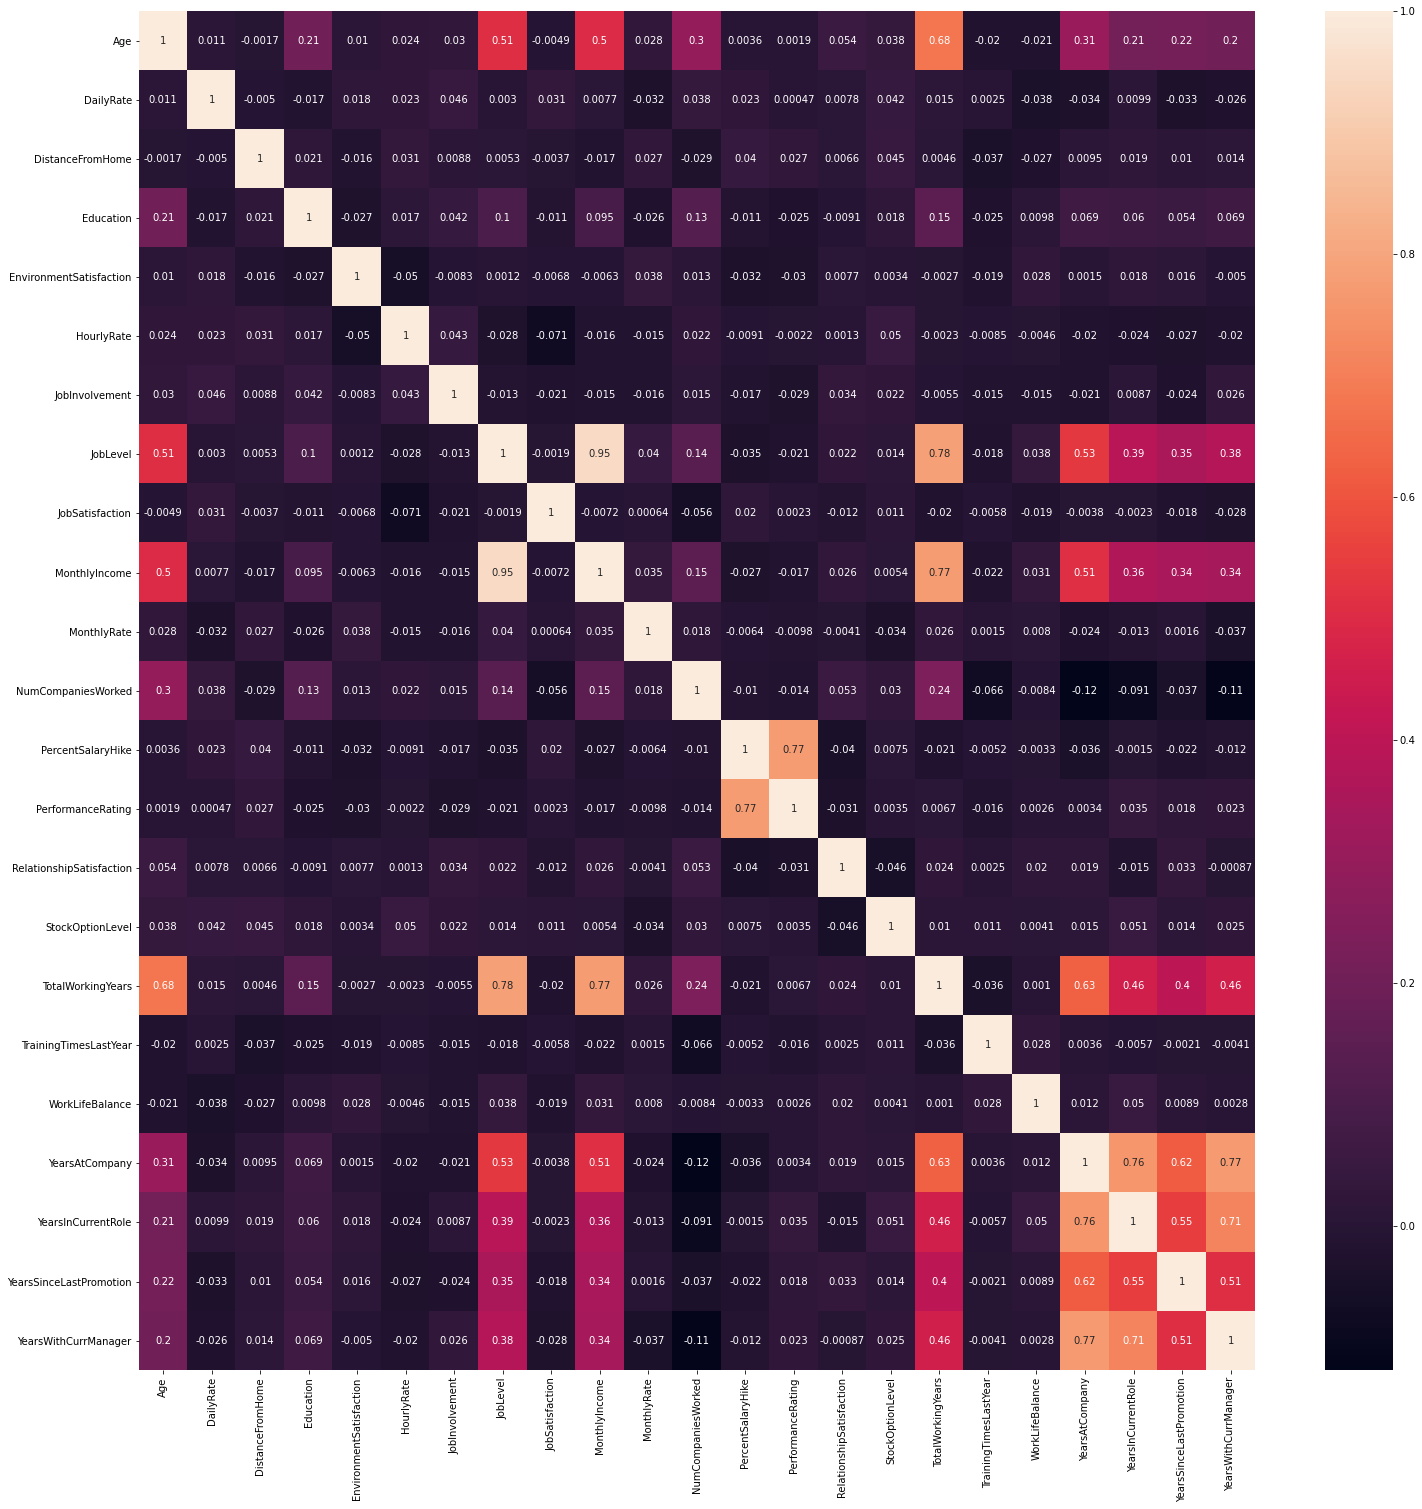

In [48]:
plt.figure(figsize = (25,25))
sb.heatmap(dfcorr, annot = True)

## Transforming the Data 

Let us now proceed with transforming the string datatype to numerics to improve the prediction efficiency

In [49]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()
df["BusinessTravel"] = le.fit_transform(df["BusinessTravel"])
df["Department"] = le.fit_transform(df["Department"])
df["EducationField"] = le.fit_transform(df["EducationField"])
df["Gender"] = le.fit_transform(df["Gender"])
df["JobRole"] = le.fit_transform(df["JobRole"])
df["MaritalStatus"] = le.fit_transform(df["MaritalStatus"])
df["OverTime"] = le.fit_transform(df["OverTime"])
df["Attrition"] = le.fit_transform(df["Attrition"])

In [52]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,1,17,3,3,5,2,0,3,0
1466,39,2,613,1,6,1,3,4,1,42,...,1,1,9,5,3,7,7,1,7,0
1467,27,2,155,1,4,3,1,2,1,87,...,2,1,6,0,3,6,2,0,3,0
1468,49,1,1023,2,2,3,3,4,1,63,...,4,0,17,3,2,9,6,0,8,0


We can now see that all the columns are coded.

## Building a Predictive Model 

Attrition in employees is what we are trying to predict in this model.

Since the attrition column is a classification column i.e - Yes/No, we are going to proceed with creating classification models to predict the attrition. 

In [54]:
#Splitting the Data into Training and Testing Parts
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop('Attrition', axis = 1)
Y = df['Attrition']

In [56]:
print(X)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37               2       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               2        591           1                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                23          2   
1466   39               2        613           1                 6          1   
1467   27               2        155           1                 4          3   
1468   49               1       1023           2                 2          3   
1469   34               2        628           1                 8          3   

      EducationField  Envir

In [57]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

## Support Vector Classifier 

In [59]:
svc=SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)

In [60]:
svc.score(X_train,Y_train)

0.837568058076225

In [61]:
print(accuracy_score(Y_test,predsvc))

0.842391304347826


In [62]:
print(confusion_matrix(Y_test,predsvc))

[[310   0]
 [ 58   0]]


In [63]:
print(classification_report(Y_test,predsvc))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



## Decision Tree Classifier 

In [65]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)

In [66]:
dtc.score(X_train,Y_train)

1.0

In [67]:
print(accuracy_score(Y_test,preddtc))

0.7744565217391305


In [68]:
print(confusion_matrix(Y_test,preddtc))

[[267  43]
 [ 40  18]]


In [69]:
print(classification_report(Y_test,preddtc))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       310
           1       0.30      0.31      0.30        58

    accuracy                           0.77       368
   macro avg       0.58      0.59      0.58       368
weighted avg       0.78      0.77      0.78       368



## Random Forest Classifier

In [70]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)

In [71]:
rfc.score(X_train,Y_train)

1.0

In [72]:
print(accuracy_score(Y_test,predrfc))

0.8559782608695652


In [73]:
print(confusion_matrix(Y_test,predrfc))

[[306   4]
 [ 49   9]]


In [74]:
print(classification_report(Y_test,predrfc))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.69      0.16      0.25        58

    accuracy                           0.86       368
   macro avg       0.78      0.57      0.59       368
weighted avg       0.84      0.86      0.82       368



## Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score

In [79]:
scoresvc=cross_val_score(svc,X,Y,cv=5)
print(scoresvc)
print(scoresvc.mean())
print(scoresvc.std())

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817
0.0016663195529137286


In [80]:
scoredtc=cross_val_score(dtc,X,Y,cv=5)
print(scoredtc)
print(scoredtc.mean())
print(scoredtc.std())

[0.78571429 0.78231293 0.79591837 0.76190476 0.79591837]
0.7843537414965986
0.012469593727771006


In [81]:
scorerfc=cross_val_score(rfc,X,Y,cv=5)
print(scorerfc)
print(scorerfc.mean())
print(scorerfc.std())

[0.85034014 0.86394558 0.8537415  0.8537415  0.86394558]
0.8571428571428571
0.005691564806354262


The difference between the mean model scores and the scores after cross validation are as follows:

1. Support Vector Classifier : 0.001207452
2. Decision Tree Classifier : 0.00989722
3. Random Forest Classifier : 0.001164596

The smallest mean difference between the three models is of Random Forest Classifier and hence, we can conclude that random forest classifier give us a better picture / prediction model to predict HR Attrition Rate in this particuler company